In [57]:
import mysql.connector
DB = mysql.connector.connect(
host='localhost', 
user = 'root', 
port = 3306, 
password='Zi241133', 
auth_plugin='mysql_native_password'
)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
c = DB.cursor() 
c.execute('use Works8paskaita')

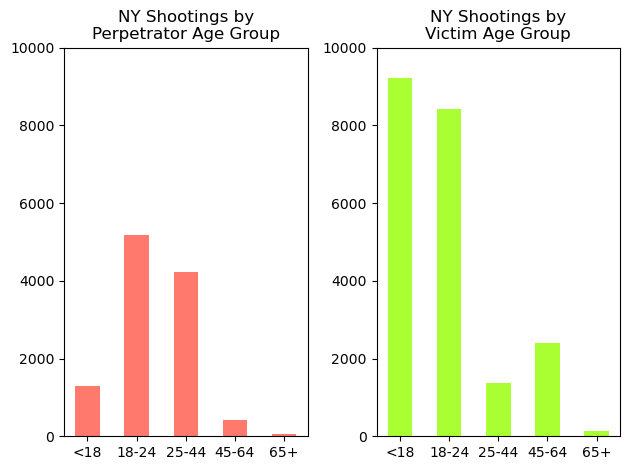

In [60]:
#1 Shootings by Age Group

#Perpetrator
sql_cmd = "select count(PERP_AGE_GROUP) from us_shooting group by perp_age_group having perp_age_group = '<18' or perp_age_group = '18-24' or perp_age_group = '25-44' or perp_age_group = '45-64' or perp_age_group = '65+'"
c.execute(sql_cmd)
ans=c.fetchall()

y1=[]
for i in ans:
    y1.append(float(i[0]))

sql_cmd= "select distinct(perp_age_group) from us_shooting having perp_age_group = '<18' or perp_age_group = '18-24' or perp_age_group = '25-44' or perp_age_group = '45-64' or perp_age_group = '65+'"
c.execute(sql_cmd)
ans2=c.fetchall()

x1=[]
for i in range(0,len(ans2)):
    x1.append(i+1)
    
#Victim
sql_cmd = "select count(VIC_AGE_GROUP) from us_shooting group by vic_age_group having VIC_AGE_GROUP != 'Unknown'"
c.execute(sql_cmd)
ans3=c.fetchall()

y2=[]
for i in ans3:
    y2.append(float(i[0]))

sql_cmd= "select distinct(vic_age_group) from us_shooting having VIC_AGE_GROUP != 'Unknown'"
c.execute(sql_cmd)
ans4=c.fetchall()

x2=[]
for i in range(0, len(ans4)):
    x2.append(ans4[i][0])

#Figures:
fig, ax = plt.subplots(1,2)
ax[0].bar(x1,y1, color='xkcd:salmon', width=0.5)
ax[0].set_xticks(x1)
ax[0].set_xticklabels(['<18', '18-24', '25-44', '45-64', '65+'])
ax[0].set_title("NY Shootings by\nPerpetrator Age Group")
ax[0].set_ylim([0, 10000])

ax[1].bar(x2,y2, color='xkcd:lime', width=0.5)
ax[1].set_xticks(x2)
ax[1].set_xticklabels(['<18', '18-24', '25-44', '45-64', '65+'])
ax[1].set_title("NY Shootings by\nVictim Age Group")
ax[1].set_ylim([0, 10000])

fig.tight_layout()
plt.show()


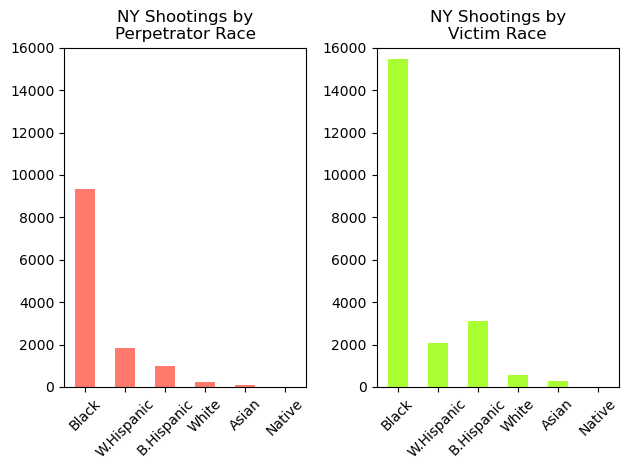

In [61]:
#2 Shootings by race

#Perpetrator
sql_cmd = "select count(PERP_RACE) from us_shooting Group by Perp_Race Having PERP_RACE = 'BLACK' or PERP_RACE = 'WHITE HISPANIC'  or PERP_RACE = 'BLACK HISPANIC' or PERP_RACE = 'WHITE'  or PERP_RACE = 'ASIAN / PACIFIC ISLANDER'  or PERP_RACE = 'AMERICAN INDIAN/ALASKAN NATIVE'"
c.execute(sql_cmd)
ans5=c.fetchall()
y3=[]
for i in ans5:
    y3.append(float(i[0]))

sql_cmd= "select distinct(perp_race) from us_shooting having PERP_RACE = 'BLACK' or PERP_RACE = 'WHITE HISPANIC'  or PERP_RACE = 'BLACK HISPANIC' or PERP_RACE = 'WHITE'  or PERP_RACE = 'ASIAN / PACIFIC ISLANDER'  or PERP_RACE = 'AMERICAN INDIAN/ALASKAN NATIVE'"
c.execute(sql_cmd)
ans6=c.fetchall()
x3=[]
for i in range(0, len(ans6)):
    x3.append(ans6[i][0])

#Victim
sql_cmd = "select count(vic_RACE) from us_shooting Group by vic_Race Having vic_RACE = 'BLACK' or vic_RACE = 'WHITE HISPANIC'  or vic_RACE = 'BLACK HISPANIC' or vic_RACE = 'WHITE'  or vic_RACE = 'ASIAN / PACIFIC ISLANDER'  or vic_RACE = 'AMERICAN INDIAN/ALASKAN NATIVE'"
c.execute(sql_cmd)
ans7=c.fetchall()
y4=[]
for i in ans7:
    y4.append(float(i[0]))

sql_cmd= "select distinct(vic_race) from us_shooting Having vic_RACE = 'BLACK' or vic_RACE = 'WHITE HISPANIC'  or vic_RACE = 'BLACK HISPANIC' or vic_RACE = 'WHITE'  or vic_RACE = 'ASIAN / PACIFIC ISLANDER'  or vic_RACE = 'AMERICAN INDIAN/ALASKAN NATIVE'"
c.execute(sql_cmd)
ans8=c.fetchall()
x4=[]
for i in range(0, len(ans8)):
    x4.append(ans8[i][0])
    
#Figures:
fig, ax = plt.subplots(1,2)
ax[0].bar(x3,y3, color='xkcd:salmon', width=0.5)
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xticklabels(['Black', 'W.Hispanic', 'B.Hispanic', 'White', 'Asian', 'Native'], rotation=45)
ax[0].set_title("NY Shootings by\nPerpetrator Race")
ax[0].set_ylim([0, 16000])

ax[1].bar(x4,y4, color='xkcd:lime', width=0.5)
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_xticklabels(['Black', 'W.Hispanic', 'B.Hispanic', 'White', 'Asian', 'Native'], rotation=45)
ax[1].set_title("NY Shootings by\nVictim Race")
ax[1].set_ylim([0, 16000])

fig.tight_layout()
plt.show()


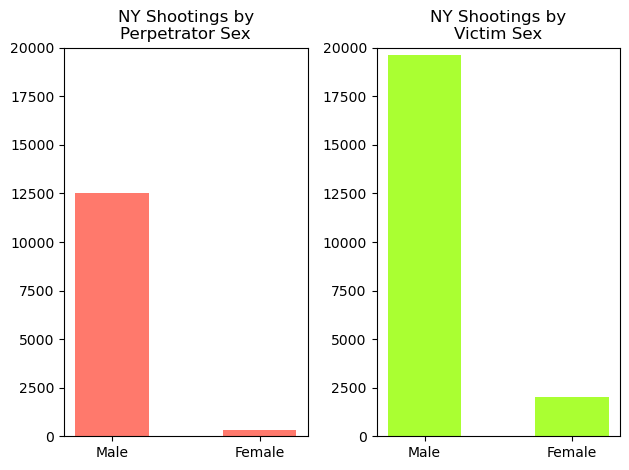

In [62]:
#3 Shootings by SEX

#Perpetrator
sql_cmd = "select count(PERP_sex) from us_shooting group by perp_sex having perp_sex = 'M' or perp_sex = 'F'"
c.execute(sql_cmd)
ans11=c.fetchall()

y6=[]
for i in ans11:
    y6.append(float(i[0]))

x6=['M', 'F']
    
#Victim
sql_cmd = "select count(vic_sex) from us_shooting group by vic_sex having vic_sex = 'M' or vic_sex = 'F'"
c.execute(sql_cmd)
ans12=c.fetchall()

y7=[]
for i in ans12:
    y7.append(float(i[0]))

x7=['M', 'F']

#Figures:
fig, ax = plt.subplots(1,2)
ax[0].bar(x6,y6, color='xkcd:salmon', width=0.5)
ax[0].set_xticks(x6)
ax[0].set_xticklabels(['Male', 'Female'])
ax[0].set_title("NY Shootings by\nPerpetrator Sex")
ax[0].set_ylim([0, 20000])
ax[1].bar(x7,y7, color='xkcd:lime', width=0.5)
ax[1].set_xticks(x7)
ax[1].set_xticklabels(['Male', 'Female'])
ax[1].set_title("NY Shootings by\nVictim Sex")
ax[1].set_ylim([0, 20000])
fig.tight_layout()
plt.show()


In [63]:
#temporary table
sql_cmd = "create temporary table SHOOT select boro, case when minute(occur_time)>30 and hour(occur_time)=23 then hour(occur_time)=0  when minute(occur_time)>30 and hour(occur_time)!=23  then hour(occur_time)+1 else hour(occur_time) end as 'shoot_hour' from us_shooting"
c.execute(sql_cmd)
ats=c.fetchall()

#dropping the table 
# sql_cmd = "drop temporary table SHOOT"
# c.execute(sql_cmd)
# ats=c.fetchall()


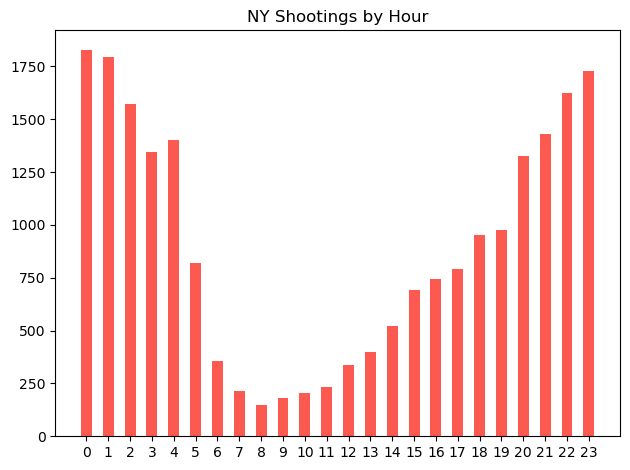

In [64]:
#4 Shooting by time
sql_cmd = "select count(shoot_hour) from SHOOT group by shoot_hour order by shoot_hour asc"
c.execute(sql_cmd)
ans14=c.fetchall()
ans14

y8=[]
for i in range(0,len(ans14)):
    y8.append(ans14[i][0])


x8=[]
for i in range(-1,23):
    x8.append(i+1)

#Figures:
fig, ax = plt.subplots()
ax.bar(x8,y8, color='xkcd:coral', width=0.5)
ax.set_xticks(x8)
ax.set_xticklabels(x8)
ax.set_title("NY Shootings by Hour")


fig.tight_layout()
plt.show()

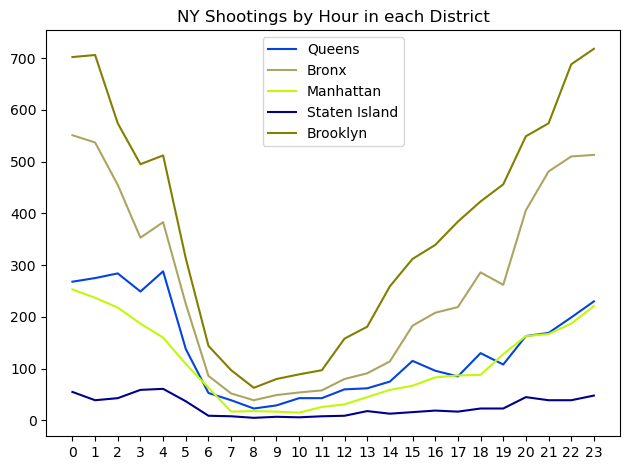

In [65]:
#5 Shootings by district and hour
sql_cmd ="select count(shoot_hour) from SHOOT where boro = 'queens' group by shoot_hour order by shoot_hour asc"    
c.execute(sql_cmd)
ans15=c.fetchall()
ans15

def boroshootings(district, col="shoot_hour"):
    sql_cmd ="select count("+col+") from SHOOT where boro = '"+district+"' group by "+col+" order by "+col+" asc"    
    c.execute(sql_cmd)
    ans=c.fetchall()
    shooting=[]
    for i in range(0,len(ans)):
        shooting.append(ans[i][0])
    return shooting

QUEENS=boroshootings('QUEENS')
BRONX=boroshootings('BRONX')
MANHATTAN=boroshootings('MANHATTAN')
STATEN_ISLAND=boroshootings('STATEN ISLAND')
BROOKLYN=boroshootings('BROOKLYN')

x8=[]
for i in range(-1,23):
    x8.append(i+1)

fig, ax = plt.subplots()

ax.plot(x8,QUEENS, color='xkcd:blue', label='Queens')
ax.plot(x8,BRONX, color='xkcd:khaki', label='Bronx')
ax.plot(x8,MANHATTAN, color='xkcd:chartreuse', label='Manhattan')
ax.plot(x8, STATEN_ISLAND, color='darkblue', label='Staten Island')
ax.plot(x8, BROOKLYN, color='olive', label='Brooklyn')

ax.legend(loc=9)
ax.set_xticks(x8)
ax.set_xticklabels(x8)
ax.set_title("NY Shootings by Hour in each District")
fig.tight_layout()
plt.show()

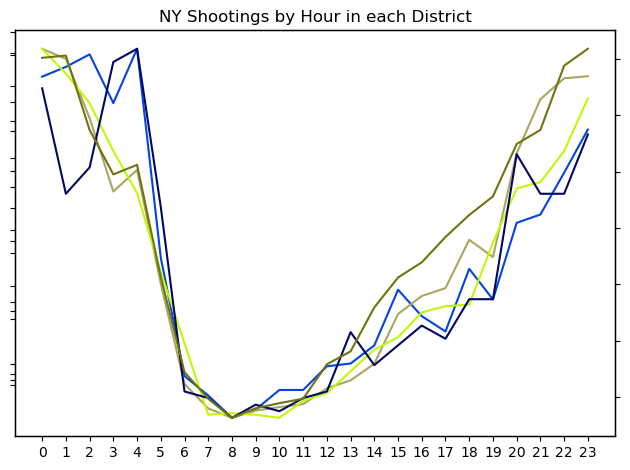

In [66]:
#5a Shootings by district and hour
sql_cmd ="select count(shoot_hour) from SHOOT where boro = 'queens' group by shoot_hour order by shoot_hour asc"    
c.execute(sql_cmd)
ats15=c.fetchall()
ats15

def boroshootings(district, col="shoot_hour"):
    sql_cmd ="select count("+col+") from SHOOT where boro = '"+district+"' group by "+col+" order by "+col+" asc"    
    c.execute(sql_cmd)
    ats=c.fetchall()
    shooting=[]
    for i in range(0,len(ats)):
        shooting.append(ats[i][0])
    return shooting

QUEENS=boroshootings('QUEENS')
BRONX=boroshootings('BRONX')
MANHATTAN=boroshootings('MANHATTAN')
STATEN_ISLAND=boroshootings('STATEN ISLAND')
BROOKLYN=boroshootings('BROOKLYN')

x8=[]
for i in range(-1,23):
    x8.append(i+1)

fig, ax = plt.subplots()

ax.plot(x8,QUEENS, color='xkcd:blue', )
ax.set_yticklabels([])
ax2=ax.twinx()
ax2.plot(x8,BRONX, color='xkcd:khaki')
ax2.set_yticklabels([])
ax3=ax2.twinx()
ax3.plot(x8,MANHATTAN, color='xkcd:chartreuse')
ax3.set_yticklabels([])
ax4=ax3.twinx()
ax4.plot(x8, STATEN_ISLAND, color='xkcd:darkblue')
ax4.set_yticklabels([])
ax5=ax4.twinx()
ax5.plot(x8, BROOKLYN, color='xkcd:olive')
ax5.set_yticklabels([])
ax.set_xticks(x8)
ax.set_xticklabels(x8)
ax.set_title("NY Shootings by Hour in each District")
fig.tight_layout()
plt.show()